# Not Hotdog

In [2]:
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from PIL import Image
import os
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
def load_image(path, size=64):
    """
    Load image, resize and crop to 64x64 
    Returns: numpy array
    """
    img = Image.open(path)

    min_dim_index = np.argmin(img.size)
    scale = float(size) / img.size[min_dim_index]
    new_dim = int(img.size[1-min_dim_index] * scale)

    # how much to cut off each image to center-crop to 64x64
    cut = new_dim - size
    shift = 0
    if cut % 2 != 0:
        shift = 1 # shift by 1px to crop correctly
    cut //= 2

    # resize & crop
    if min_dim_index == 0:
        img = img.resize((size, new_dim), Image.ANTIALIAS)
        img = img.crop((0, cut, size, new_dim - shift - cut)) # crop height
    else:
        img = img.resize((new_dim, size), Image.ANTIALIAS)
        img = img.crop((cut, 0, new_dim - shift - cut, size)) # crop width

    img = np.array(img)
    
    img_shape = (size, size, 3)
    assert img.shape == img_shape, '{} shape must be {}, not {}'.format(path, img_shape, img.shape)
        
    return img


def load_data(num_valid=1500, num_test=1000):
    """
    Load raw images from datasets directory and preprocess
    13,385 images total: 6808 hotdog/6577 not hotdog
    
    Returns: train/val/test set with labels
    """
    X = []
    y = []
    for path, _, files in os.walk('datasets'):
        for file in files:
            if not file.startswith('.'):
                X.append(load_image(os.path.join(path, file)))
                y.append(1 if path == 'datasets/hotdog' else 0)
                    
    X = np.stack(X, axis=0)
    y = np.array(y)
    
    # shuffle data
    np.random.seed(0)
    shuffle = np.arange(X.shape[0])
    np.random.shuffle(shuffle)
    
    X = X[shuffle]
    y = y[shuffle]
                
    # train/val/test splits
    X_train = X[:-num_valid-num_test]
    y_train = y[:-num_valid-num_test]
    
    X_valid = X[-num_valid-num_test:-num_test]
    y_valid = y[-num_valid-num_test:-num_test]
    
    X_test = X[-num_test:]
    y_test = y[-num_test:]
 
    return X_train, y_train, X_valid, y_valid, X_test, y_test

# load data
X_train, y_train, X_valid, y_valid, X_test, y_test = load_data()

/usr/local/lib/python3.5/dist-packages/PIL/TiffImagePlugin.py:804: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


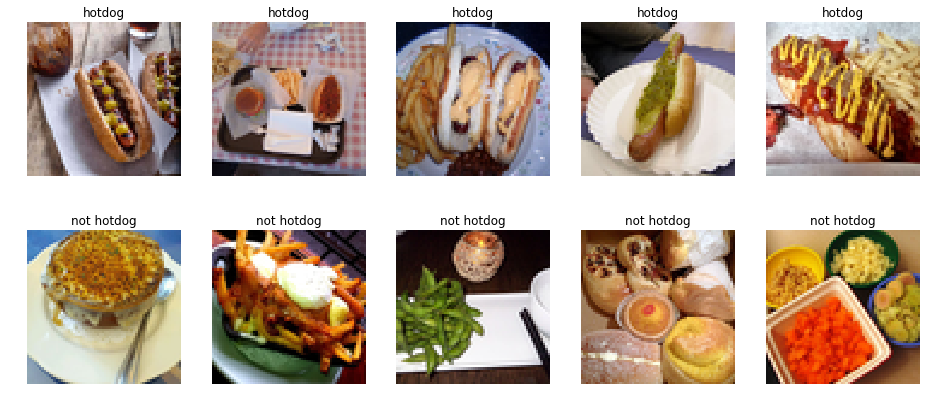

In [9]:
# sample random images
n = 5
hotdog_sample = np.random.choice(np.where(y_train==1)[0], n, replace=False)
not_hotdog_sample = np.random.choice(np.where(y_train==0)[0], n, replace=False)

plt.figure(figsize=(16, 7))
for i in range(n):
    plt.subplot(2, n, i+1)
    plt.imshow(X_train[hotdog_sample[i]])
    plt.title('hotdog')
    plt.axis('off')
    
    plt.subplot(2, n, n+i+1)
    plt.imshow(X_train[not_hotdog_sample[i]])
    plt.title('not hotdog')
    plt.axis('off')
plt.show()

In [10]:
# normalize
mean_image = X_train.mean(axis=0)
X_train = X_train - mean_image
X_valid = X_valid - mean_image
X_test = X_test - mean_image

Epoch 1/100
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
43/42 [==============================] - 13s 312ms/step - loss: 1.0521 - accuracy: 0.5571 - val_loss: 7.8324 - val_accuracy: 0.4680
Epoch 2/100
43/42 [==============================] - 11s 245ms/step - loss: 0.6578 - accuracy: 0.6093 - val_loss: 2.2124 - val_accuracy: 0.4720
Epoch 3/100
43/42 [==============================] - 11s 253ms/step - loss: 0.6424 - accuracy: 0.6336 - val_loss: 0.7148 - val_accuracy: 0.5900
Epoch 4/100
43/42 [==============================] - 11s 251ms/step - loss: 0.6294 - accuracy: 0.6450 - val_loss: 0.6159 - val_accuracy: 0.6640
Epoch 5/100
43/42 [==============================] - 11s 255ms/step - loss: 0.6173 - accuracy: 0.6630 - val_loss: 0.6372 - val_accuracy: 0.6547
Epoch 6/100
43/42 [==============================] - 11s 257ms/step - loss: 0.6061 - accuracy: 0.6709 - val_loss: 0.6333 - val_accuracy: 0.6413
Epoch 7/100
43/42 [=======================

43/42 [==============================] - 11s 251ms/step - loss: 0.3955 - accuracy: 0.8178 - val_loss: 0.4598 - val_accuracy: 0.8027
Epoch 56/100
43/42 [==============================] - 11s 251ms/step - loss: 0.3933 - accuracy: 0.8144 - val_loss: 0.4292 - val_accuracy: 0.8213
Epoch 57/100
43/42 [==============================] - 11s 253ms/step - loss: 0.3974 - accuracy: 0.8144 - val_loss: 0.4474 - val_accuracy: 0.7947
Epoch 58/100
43/42 [==============================] - 11s 257ms/step - loss: 0.3872 - accuracy: 0.8240 - val_loss: 0.4497 - val_accuracy: 0.8167
Epoch 59/100
43/42 [==============================] - 11s 252ms/step - loss: 0.3830 - accuracy: 0.8243 - val_loss: 0.4389 - val_accuracy: 0.8247
Epoch 60/100
43/42 [==============================] - 11s 251ms/step - loss: 0.3885 - accuracy: 0.8165 - val_loss: 0.5453 - val_accuracy: 0.7627
Epoch 61/100
43/42 [==============================] - 11s 257ms/step - loss: 0.3847 - accuracy: 0.8236 - val_loss: 0.3833 - val_accuracy: 0.827

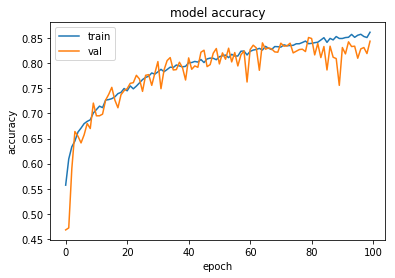

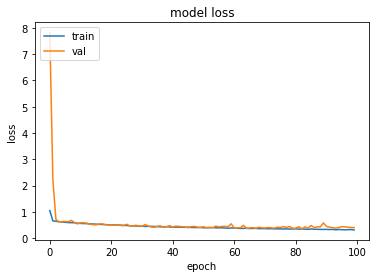

1000/1000 [==============================] - 0s 411us/sample - loss: 0.3875 - accuracy: 0.8480


In [11]:
# define model
model = Sequential([
    Conv2D(32, kernel_size=5, strides=2, padding='same', input_shape=(64, 64, 3)),
    BatchNormalization(),
    ReLU(),
    
    Conv2D(64, kernel_size=5, strides=2, padding='same'),
    BatchNormalization(),
    ReLU(),
    Dropout(0.3),
    
    Conv2D(64, kernel_size=5, strides=2, padding='same'),
    BatchNormalization(),
    ReLU(),
    Dropout(0.3),
    
    Flatten(),
    Dense(1024),
    BatchNormalization(),
    ReLU(),
    Dense(1, activation='sigmoid')
])

# augment data
datagen = ImageDataGenerator(
    rotation_range=45,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

model.compile(optimizer=Adam(1e-2), loss='binary_crossentropy', metrics=['accuracy']) # 8e-3

history = model.fit_generator(
    datagen.flow(X_train, y_train, batch_size=256),
    steps_per_epoch=len(X_train) / 256, 
    epochs=100,
    validation_data=(X_valid, y_valid))

# plot accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

model.evaluate(X_test, y_test)

tf.keras.backend.clear_session()